## First Chapter Introduction
For both supervised and unsupervised learning tasks, it is important to have a representation of your input data that a computer can understand
we need built a good representation of data, with is called **feature extraction** or **feature engineering**



Numpy array :
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Scipy sparse CRS matirc is:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


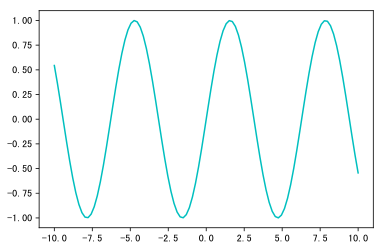

In [1]:
### Toolkit SciPy
# The most important part of SciPy id scipy.sparce:this privides sparse matrics
from scipy import sparse
import numpy as np

#Create a 2D Numpy array with a diagoanl of ones and zeros everywhere else
eye = np.eye(4)
print('Numpy array :\n{}'.format(eye))

sparse_matric = sparse.csc_matrix(eye)
print('\nScipy sparse CRS matirc is:\n{}'.format(sparse_matric))

### Toolkit matplotlib
import matplotlib.pyplot as plt
#内嵌画图  可以省略plt.show()
%matplotlib inline

%config InlineBackend.figure_format = 'svg'
# 上面的最后一行指定了输出的格式是 svg，这样浏览器就能为你渲染矢量图了

x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,'c')

## First application : Classifying the iris species
### generate train and test data

In [2]:
p = print 
import pprint
pp = pprint.pprint
from sklearn.datasets import load_iris
iris_dataset = load_iris()  
p('iris dataset keys: \n', iris_dataset.keys())

p(iris_dataset['DESCR'][:200], '\n...')
p('target names: \n', iris_dataset['target_names'])

# print the shape of dataset and target
p('\nthe shape of dataset and target: \n', iris_dataset['data'].shape,'\n', iris_dataset['target'].shape)


iris dataset keys: 
 dict_keys(['feature_names', 'DESCR', 'target_names', 'data', 'target'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes 
...
target names: 
 ['setosa' 'versicolor' 'virginica']

the shape of dataset and target: 
 (150, 4) 
 (150,)


In [3]:
# train_test_split shuffle the dataset and keep 75:25 train test ratio
# to make outcome deterministic, we fix the random_state
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                random_state=0)
p('The shape of X_train and X_test is \n', X_train.shape, '\n', X_test.shape)

The shape of X_train and X_test is 
 (112, 4) 
 (38, 4)


### Look at Your Data 

### 对多维数据进行显示 利用pandas高维作图
对角线部分： 核密度估计图（Kernel Density Estimation），就是用来看某 一个 变量分布情况，横轴对应着该变量的值，纵轴对应着该变量的密度（可以理解为出现频次）。 
非对角线部分：两个 变量之间分布的关联散点图。将任意两个变量进行配对，以其中一个为横坐标，另一个为纵坐标，将所有的数据点绘制在图上，用来衡量两个变量的关联度（Correlation）。用协方差来表示
> 协方差是用来表示两个随机变量之间关系的统计量[-1,1], 正值表示正相关 负值表示负相关 零表示无关


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f77160>,
      dtype=object)

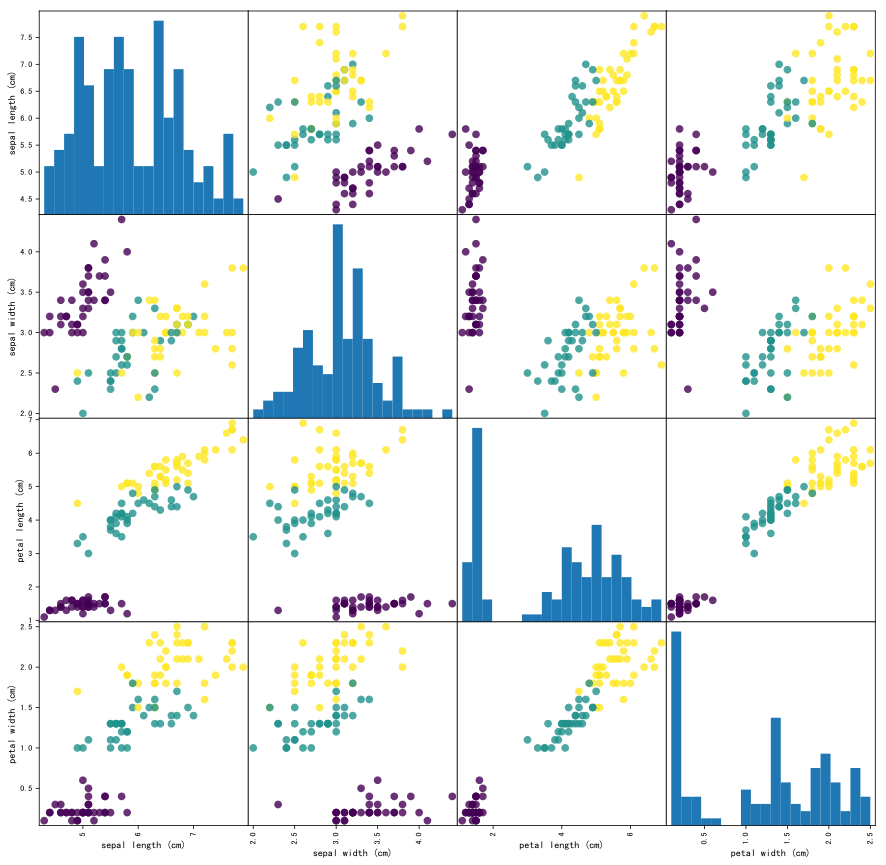

In [10]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
p(iris_dataframe.head())

# 对于多维数据， 两两一组分析， 每个维度信息和所以维度信息做对比，4维信息产生16张图
from pandas.plotting import scatter_matrix
import mglearn
scatter_matrix(iris_dataframe, alpha=0.8, c=y_train, figsize=(15,15),
               marker='o',hist_kwds={'bins': 20}, s=60)

In [14]:
## build model K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
'''
K值的选择与样本分布有关，一般选择一个较小的K值，可以通过交叉验证来选择一个比较优的K值，默认值是5。
如果数据是三维或者三维以下的，可以通过可视化观察来调参
'''
def knnModel(K):
    K=K
    # create model
    knn = KNeighborsClassifier(n_neighbors=K)
    # train
    knn.fit(X_train, y_train)
    # predict and evaluate
    pred = knn.predict(X_test)
    score = np.mean(pred==y_test)
    print('with the K value {}, Test set score is :{:.2f}'.format(K, score))
    
for i in range(1, 5):
    knnModel(i)

with the K value 1, Test set score is :0.97
with the K value 2, Test set score is :0.97
with the K value 3, Test set score is :0.97
with the K value 4, Test set score is :0.97
